In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime

In [46]:
# Provide the correct file path to your CSV file
df = pd.read_csv("Resources/fx.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-Jan-21,0.777180,0.820760,0.769823,0.770297,0.770297,0
1,04-Jan-21,0.771300,0.774200,0.765660,0.771230,0.771230,0
2,05-Jan-21,0.766980,0.775300,0.766289,0.767100,0.767100,0
3,06-Jan-21,0.776280,0.782038,0.773431,0.776600,0.776600,0
4,07-Jan-21,0.781540,0.781540,0.772770,0.781700,0.781700,0
...,...,...,...,...,...,...,...
738,01-Nov-23,0.633995,0.639321,0.631930,0.633995,0.633995,0
739,02-Nov-23,0.642260,0.645610,0.641410,0.642260,0.642260,0
740,03-Nov-23,0.642790,0.650915,0.642100,0.642790,0.642790,0
741,06-Nov-23,0.651687,0.652500,0.649400,0.651687,0.651687,0


In [47]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
738,01-Nov-23,0.633995,0.639321,0.631930,0.633995,0.633995,0
739,02-Nov-23,0.642260,0.645610,0.641410,0.642260,0.642260,0
740,03-Nov-23,0.642790,0.650915,0.642100,0.642790,0.642790,0
741,06-Nov-23,0.651687,0.652500,0.649400,0.651687,0.651687,0
742,07-Nov-23,0.649279,0.649477,0.648967,0.648980,0.648980,0


In [48]:
df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-Jan-21,0.77718,0.820760,0.769823,0.770297,0.770297,0
1,04-Jan-21,0.77130,0.774200,0.765660,0.771230,0.771230,0
2,05-Jan-21,0.76698,0.775300,0.766289,0.767100,0.767100,0
3,06-Jan-21,0.77628,0.782038,0.773431,0.776600,0.776600,0
4,07-Jan-21,0.78154,0.781540,0.772770,0.781700,0.781700,0


In [50]:
#df=df.drop('Date', 'Adj Close', axis=1)
#df.drop(['Date', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [51]:
df.drop(['Adj Close', 'Volume'], axis=1, inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    743 non-null    object 
 1   Open    743 non-null    float64
 2   High    743 non-null    float64
 3   Low     743 non-null    float64
 4   Close   743 non-null    float64
dtypes: float64(4), object(1)
memory usage: 29.1+ KB


In [53]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    743 non-null    datetime64[ns]
 1   Open    743 non-null    float64       
 2   High    743 non-null    float64       
 3   Low     743 non-null    float64       
 4   Close   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.1 KB


,Date,Open,High,Low,Close
0,2021-01-01,0.77718,0.820760,0.769823,0.770297
1,2021-01-04,0.77130,0.774200,0.765660,0.771230
2,2021-01-05,0.76698,0.775300,0.766289,0.767100
3,2021-01-06,0.77628,0.782038,0.773431,0.776600
4,2021-01-07,0.78154,0.781540,0.772770,0.781700


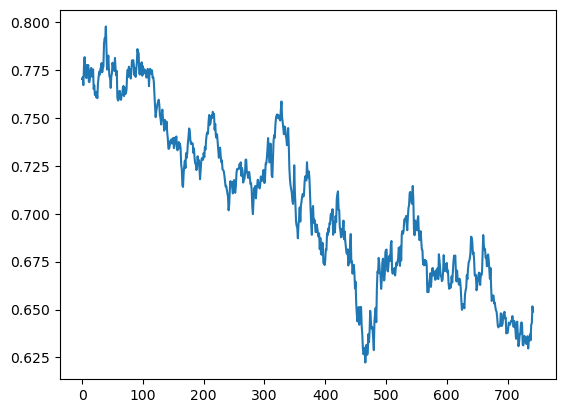

In [54]:
plt.plot(df.Close)

In [55]:
#create 100 moving average
ma100=df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
738    0.652851
739    0.652477
740    0.652025
741    0.651665
742    0.651304
Name: Close, Length: 743, dtype: float64

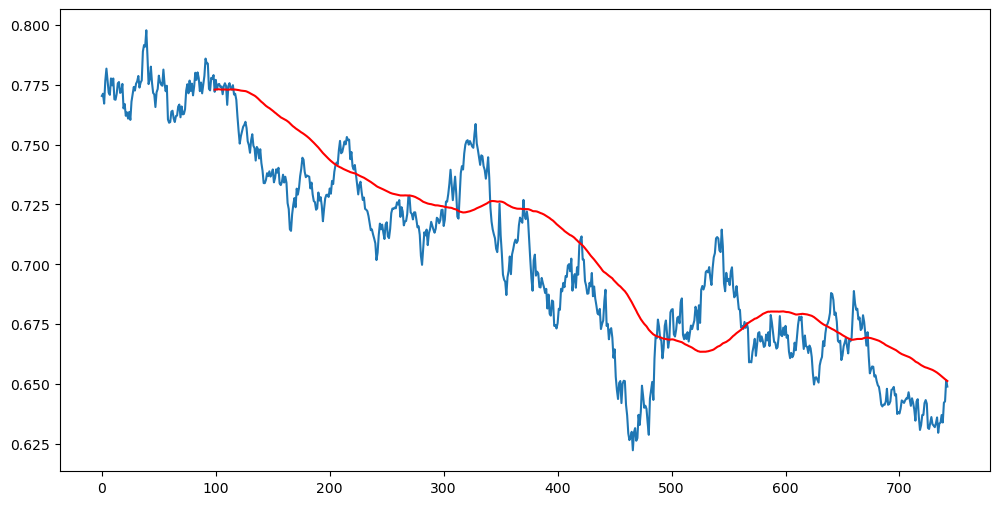

In [57]:

plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [58]:
df.shape

(743, 5)

In [59]:
data_training = pd.DataFrame(df['Close'][:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):])
print(data_training.shape)
print(data_testing.shape)


(520, 1)
(223, 1)


In [60]:
data_training.head()

,Close
0,0.770297
1,0.771230
2,0.767100
3,0.776600
4,0.781700


In [61]:
data_testing.head()

,Close
520,0.676600
521,0.682310
522,0.680560
523,0.672800
524,0.682911


In [62]:
from sklearn.preprocessing import MinMaxScaler

# Define your desired feature range (for example, scaling between 0 and 1)
feature_range = (0, 1)

# Create the MinMaxScaler with the feature_range parameter
scaler = MinMaxScaler(feature_range)

# Fit and transform your data
data_training_array = scaler.fit_transform(data_training)


In [63]:
data_training_array

array([[0.84367032],
       [0.84899235],
       [0.82543395],
       [0.87962398],
       [0.90871547],
       [0.88133524],
       [0.85140523],
       [0.84625433],
       [0.88535671],
       [0.86886013],
       [0.88521411],
       [0.83563308],
       [0.83455499],
       [0.84870714],
       [0.87374864],
       [0.87678328],
       [0.85098883],
       [0.85281417],
       [0.87228836],
       [0.81402552],
       [0.8246924 ],
       [0.79633105],
       [0.80467061],
       [0.78961719],
       [0.8054692 ],
       [0.78664529],
       [0.8301114 ],
       [0.8482508 ],
       [0.86507823],
       [0.85643635],
       [0.87277892],
       [0.87854018],
       [0.89114649],
       [0.86359514],
       [0.8754599 ],
       [0.88076482],
       [0.94949489],
       [0.96484493],
       [0.96109726],
       [1.        ],
       [0.9389478 ],
       [0.87187766],
       [0.88304651],
       [0.91339292],
       [0.87511765],
       [0.85087474],
       [0.847167  ],
       [0.817

In [64]:
data_training_array.shape


(520, 1)

In [65]:
x_train=[]
y_train=[]
for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [66]:
x_train.shape

(420, 100, 1)

In [67]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [68]:
model = Sequential()
model.add(LSTM(units= 50, activation = 'relu', return_sequences =True, 
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units= 60, activation = 'relu', return_sequences =True, 
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.3))


model.add(LSTM(units= 80, activation = 'relu', return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units= 120, activation = 'relu')) 
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [69]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001E43B68BCD0>>

In [70]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs =50)

Epoch 1/50
14/14 [==============================] - 7s 168ms/step - loss: 0.1622
Epoch 2/50
14/14 [==============================] - 2s 161ms/step - loss: 0.0357
Epoch 3/50
14/14 [==============================] - 2s 160ms/step - loss: 0.0240
Epoch 4/50
14/14 [==============================] - 2s 168ms/step - loss: 0.0200
Epoch 5/50
14/14 [==============================] - 2s 167ms/step - loss: 0.0186
Epoch 6/50
14/14 [==============================] - 2s 168ms/step - loss: 0.0176
Epoch 7/50
14/14 [==============================] - 2s 167ms/step - loss: 0.0163
Epoch 8/50
14/14 [==============================] - 2s 158ms/step - loss: 0.0161
Epoch 9/50
14/14 [==============================] - 2s 158ms/step - loss: 0.0148
Epoch 10/50
14/14 [==============================] - 2s 159ms/step - loss: 0.0140
Epoch 11/50
14/14 [==============================] - 2s 164ms/step - loss: 0.0178
Epoch 12/50
14/14 [==============================] - 2s 168ms/step - loss: 0.0147
Epoch 13/50
14/14 [======

In [71]:
model.save('My Keras_model.h5')

C:\Users\tuanq\anaconda3\envs\Giang\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:
data_testing.head()

,Close
520,0.676600
521,0.682310
522,0.680560
523,0.672800
524,0.682911


In [73]:
past_100_days = data_training.tail(100)

In [74]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\tuanq\AppData\Local\Temp\ipykernel_15216\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [75]:

#final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [76]:
final_df.head()

,Close
0,0.710290
1,0.711668
2,0.702000
3,0.701940
4,0.693040


In [77]:
input_data=scaler.fit_transform (final_df)
input_data

array([[0.95429179],
       [0.96925282],
       [0.8642868 ],
       [0.86363538],
       [0.76700758],
       [0.74616203],
       [0.70915033],
       [0.7108766 ],
       [0.75897336],
       [0.74267692],
       [0.80346557],
       [0.69807613],
       [0.74215578],
       [0.68775107],
       [0.65637418],
       [0.62032875],
       [0.61490022],
       [0.64063145],
       [0.5495516 ],
       [0.57266628],
       [0.58840901],
       [0.67645973],
       [0.72746618],
       [0.56354635],
       [0.57310056],
       [0.50307255],
       [0.54617506],
       [0.55344929],
       [0.51056392],
       [0.41925607],
       [0.45758148],
       [0.33305105],
       [0.27366295],
       [0.23240614],
       [0.30514842],
       [0.31383406],
       [0.21390572],
       [0.30167416],
       [0.31502834],
       [0.31350835],
       [0.20679435],
       [0.15839359],
       [0.07694396],
       [0.04610992],
       [0.05794411],
       [0.08366447],
       [0.        ],
       [0.081

In [78]:
input_data.shape

(323, 1)

In [79]:
x_test =[]
y_test=[]

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [80]:
x_test, y_test =np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(223, 100, 1)
(223,)


In [81]:
# Making prediction
y_predicted = model.predict(x_test)

7/7 [==============================] - 1s 61ms/step


In [82]:
y_predicted.shape


(223, 1)

In [83]:
y_test


array([0.58851758, 0.65051137, 0.63151152, 0.54726076, 0.65703646,
       0.57733481, 0.72746618, 0.74453347, 0.7285736 , 0.74594489,
       0.80763468, 0.81380149, 0.80609298, 0.82998936, 0.78177317,
       0.74920201, 0.82378998, 0.87436215, 0.89329685, 0.96004603,
       0.96623456, 0.95980718, 0.90565218, 0.89837796, 1.        ,
       0.92366404, 0.7565848 , 0.72075652, 0.80413871, 0.7665733 ,
       0.77675721, 0.74863744, 0.81000152, 0.82908822, 0.7414935 ,
       0.6931796 , 0.70079039, 0.74377348, 0.69263674, 0.63945888,
       0.63642977, 0.55559898, 0.56354635, 0.55028988, 0.5817862 ,
       0.5548607 , 0.57615139, 0.55279786, 0.3985191 , 0.40177621,
       0.3985191 , 0.44542158, 0.47256422, 0.50502682, 0.42815886,
       0.47712418, 0.53120318, 0.53520943, 0.49286691, 0.51611187,
       0.49688402, 0.46834082, 0.47354135, 0.52436323, 0.49783945,
       0.53512258, 0.47223851, 0.61294595, 0.57991879, 0.53497058,
       0.49081493, 0.48808981, 0.46073003, 0.46691855, 0.51577

In [84]:
y_predicted

array([[0.52598965],
       [0.523631  ],
       [0.5231638 ],
       [0.52475727],
       [0.52764463],
       [0.53173226],
       [0.53637135],
       [0.5420107 ],
       [0.54917777],
       [0.55795836],
       [0.5682433 ],
       [0.5801214 ],
       [0.59342456],
       [0.6077094 ],
       [0.6225628 ],
       [0.6371672 ],
       [0.65041804],
       [0.66212773],
       [0.67278194],
       [0.6829791 ],
       [0.6934696 ],
       [0.70465696],
       [0.7165742 ],
       [0.7286892 ],
       [0.74028444],
       [0.751492  ],
       [0.7618833 ],
       [0.7696382 ],
       [0.7732123 ],
       [0.772747  ],
       [0.7686584 ],
       [0.7617928 ],
       [0.7529541 ],
       [0.74336815],
       [0.7342149 ],
       [0.7256775 ],
       [0.7173743 ],
       [0.70904005],
       [0.70090663],
       [0.69291615],
       [0.68467176],
       [0.67593986],
       [0.6661509 ],
       [0.65511376],
       [0.64289105],
       [0.6300134 ],
       [0.61693364],
       [0.604

In [85]:
scaler.scale_

array([10.857056])

In [86]:
scale_factor= 1/7.3434379
y_predicted =y_predicted * scale_factor
y_test =y_test *scale_factor

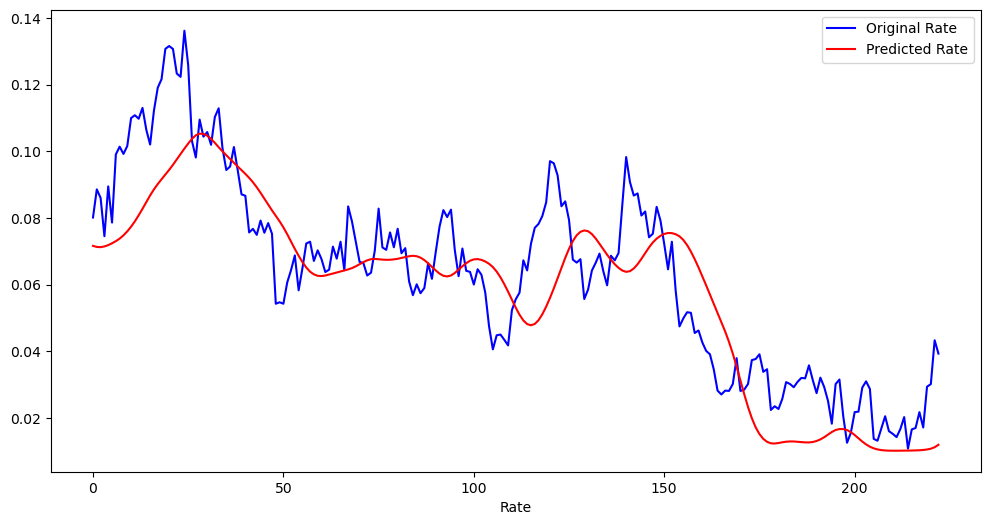

In [87]:
plt.figure(figsize =(12,6))
plt.plot(y_test, 'b', label = 'Original Rate')
plt.plot(y_predicted, 'r', label = 'Predicted Rate')
plt.xlabel('Time')
plt.xlabel('Rate')
plt.legend()
plt.show()
plt.savefig('MovingAverage_LSTM')